1. Data Loading and Cleaning

· Load the dataset into a Pandas DataFrame.

· Identify and handle missing values appropriately (e.g., using imputation techniques).

· Convert categorical variables into numerical format (e.g., label encoding or one-hot encoding).

· Scale numerical features if necessary (e.g., StandardScaler, MinMaxScaler) and explain why.

In [22]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

df = pd.read_csv("./credit_approval_anonymized.csv")

df.replace("", np.nan, inplace=True)
df.dropna(inplace = True)

categorical_cols = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']
numerical_cols = ['A2', 'A3', 'A8', 'A11', 'A14', 'A15']


target_map = {'+': 1, '-': 0}
df['A16'] = df['A16'].map(target_map)

encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])


scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

### Clarification to why we are using StandardScaling
Standardscaling is more prone to tolerate higher income debt

2. Exploratory Data Analysis (EDA) – Focus on Visualization


Since we have not covered statistical analysis in detail, focus on visualizing the dataset:

· Distribution of features: Use histograms to explore numerical columns.

· Target variable distribution: Use a bar chart to show the proportion of approved vs. denied applications.

· Feature relationships: Use scatter plots, pair plots, or correlation heatmaps to explore potential relationships.


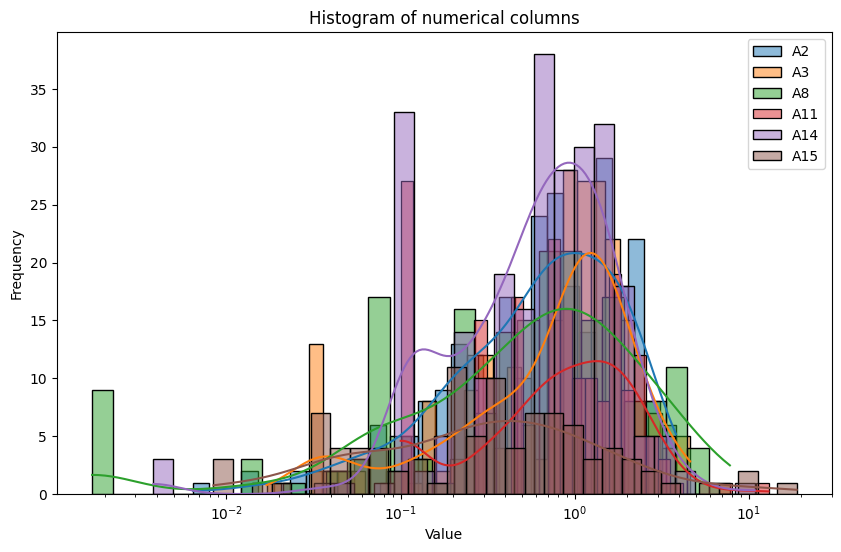

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['A2', 'A3', 'A8','A11', 'A14', 'A15']


plt.figure(figsize=(10, 6))
for col in num_cols:
    sns.histplot(df[col], bins=30, kde=True, label=col, alpha=0.5, log_scale=True)

plt.legend()
plt.title("Histogram of numerical columns")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()





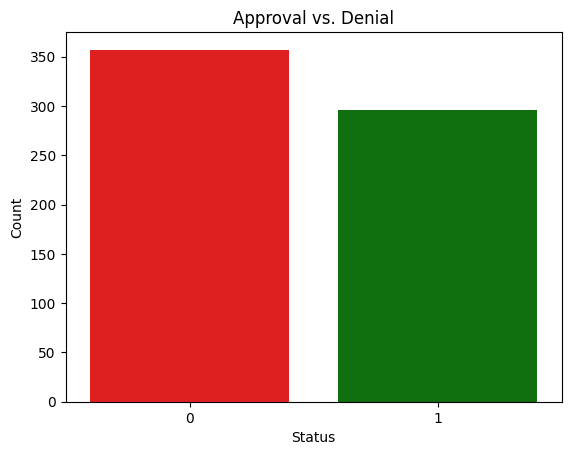

In [24]:
sns.countplot(x='A16', data=df, hue="A16", palette={1 : 'green', 0 : 'red'}, legend=False)

plt.xlabel("Status")
plt.ylabel("Count")
plt.title("Approval vs. Denial")

plt.show()

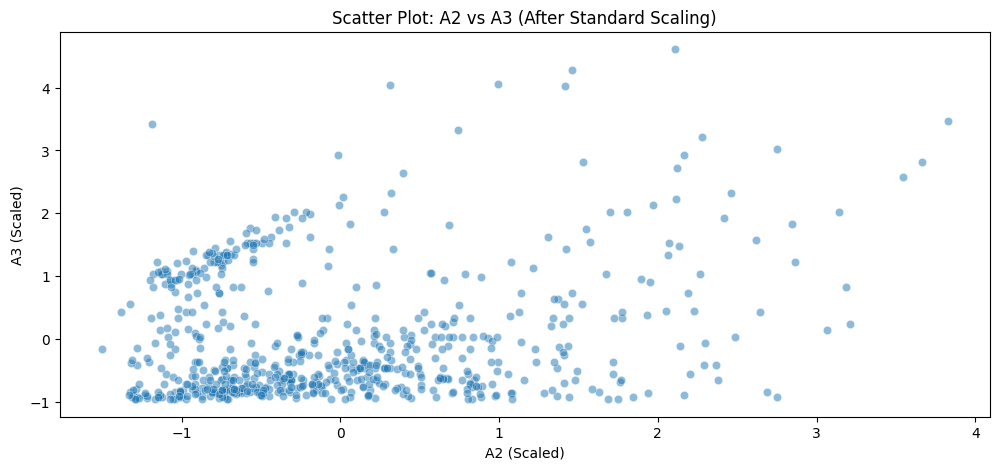

In [25]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x=df['A2'], y=df['A3'], alpha=0.5)
plt.xlabel("A2 (Scaled)")
plt.ylabel("A3 (Scaled)")
plt.title("Scatter Plot: A2 vs A3 (After Standard Scaling)")
plt.show()

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

X = df.drop(columns=['A16'])
y = df['A16']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'k-NN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42)
}

cv_results = {}
cv_scores = {}


for name, model in models.items():
    accuracy = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    precision = cross_val_score(model, X_train, y_train, cv=5, scoring='precision')
    recall = cross_val_score(model, X_train, y_train, cv=5, scoring='recall')
    f1 = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')

    cv_results[name] = {
        'accuracy': accuracy.mean(),
        'precision': precision.mean(),
        'recall': recall.mean(),
        'f1': f1.mean()
    }

    cv_scores[name] = f1.mean()
    print(f"\n{name} Cross-Validation Results:")
    print(f"Accuracy: {accuracy.mean():.4f} (±{accuracy.std():.4f})")
    print(f"Precision: {precision.mean():.4f} (±{precision.std():.4f})")
    print(f"Recall: {recall.mean():.4f} (±{recall.std():.4f})")
    print(f"F1-Score: {f1.mean():.4f} (±{f1.std():.4f})")


Logistic Regression Cross-Validation Results:
Accuracy: 0.8735 (±0.0330)
Precision: 0.8318 (±0.0443)
Recall: 0.9127 (±0.0361)
F1-Score: 0.8696 (±0.0333)

Decision Tree Cross-Validation Results:
Accuracy: 0.8007 (±0.0334)
Precision: 0.7975 (±0.0498)
Recall: 0.7674 (±0.0433)
F1-Score: 0.7806 (±0.0332)

k-NN Cross-Validation Results:
Accuracy: 0.7643 (±0.0226)
Precision: 0.7717 (±0.0325)
Recall: 0.6973 (±0.0257)
F1-Score: 0.7322 (±0.0233)

Random Forest Cross-Validation Results:
Accuracy: 0.8869 (±0.0207)
Precision: 0.8735 (±0.0254)
Recall: 0.8836 (±0.0367)
F1-Score: 0.8780 (±0.0232)
